In [1]:
"""
References:
1) https://pyimagesearch.com/2021/05/12/adaptive-thresholding-with-opencv-cv2-adaptivethreshold/
2) https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123
3) https://pyimagesearch.com/2015/04/06/zero-parameter-automatic-canny-edge-detection-with-python-and-opencv/
""" 

'\nReferences:\n1) https://pyimagesearch.com/2021/05/12/adaptive-thresholding-with-opencv-cv2-adaptivethreshold/\n2) https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123\n3) https://pyimagesearch.com/2015/04/06/zero-parameter-automatic-canny-edge-detection-with-python-and-opencv/\n'

In [2]:
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------LIBRARIES---------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#------------------------------------------------------------------------------------------COMPUTER VISION------------------------------------------------------------------------------------------
import glob                                                                                                        #finds all the pathnames matching a specified pattern according to unix shell
import cv2  
from PIL import Image                                                                                              #import pillow library to use OpenCV images with tkinter
from PIL import ImageTk                                                                                            
from scipy import ndimage 

#---------------------------------------------------------------------------------------STATISTICS & PLOTTING---------------------------------------------------------------------------------------
import statistics
from matplotlib import pyplot as plt

#---------------------------------------------------------------------------------------------GENERAL-----------------------------------------------------------------------------------------------
import pandas as pd   
import numpy as np
from numpy import mean
from numpy import std
import os
import time                                                                                                        #provides various time-related functions
import math                                                                                                        #provides access to the mathematical functions defined by the C standard
import operator                                                                                                    #additional efficient python fucntions 
import csv  

#-------------------------------------------------------------------------------------JUPYTER NOTEBOOK SETTINGS-------------------------------------------------------------------------------------
from IPython.core.display import display, HTML                                    
display(HTML("<style>.container { width:100% !important; }</style>"))     

C:\Users\Ciprian-Florin Ifrim\AppData\Local\Temp\ipykernel_18844\1904069843.py:49: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7622736922367916596
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 22385000448
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10530049251348263950
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:01:00.0, compute capability: 8.9"
xla_global_id: 416903419
]
INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 4090, compute capability 8.9
Compute dtype: float16
Variable dtype: float32


In [8]:
#-------------------------------------------------------------------------------------------DISTANCE BETWEEN TWO POINTS-----------------------------------------------------------------------------
def calculateDistance(x1,y1,x2,y2):
    dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return dist

#---------------------------------------------------------------------------------------------3-CHANNEL IMAGE TO B&W--------------------------------------------------------------------------------
def to_bw(image):
    output = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return output

#-------------------------------------------------------------------------------------------------IMAGE ROTATION------------------------------------------------------------------------------------
def rotate_img(img, angle):
    result = ndimage.rotate(img, angle) 
    return result 

#----------------------------------------------------------------------------------------------MATLAB IMAGE DISPLAY---------------------------------------------------------------------------------
def cv2_imshow(a, **kwargs):
    a = a.clip(0, 255).astype('uint8')
    # cv2 stores colors as BGR; convert to RGB
    if a.ndim == 3:
        if a.shape[2] == 4:
            a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
        else:
            a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)

    return plt.imshow(a, **kwargs)

#------------------------------------------------------------------------------------------GAUSSIAN CALCULATION FUNCTION------------------------------------------------------------------------------
def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g


IndentationError: unexpected indent (3782217031.py, line 66)

NameError: name 'mlines' is not defined

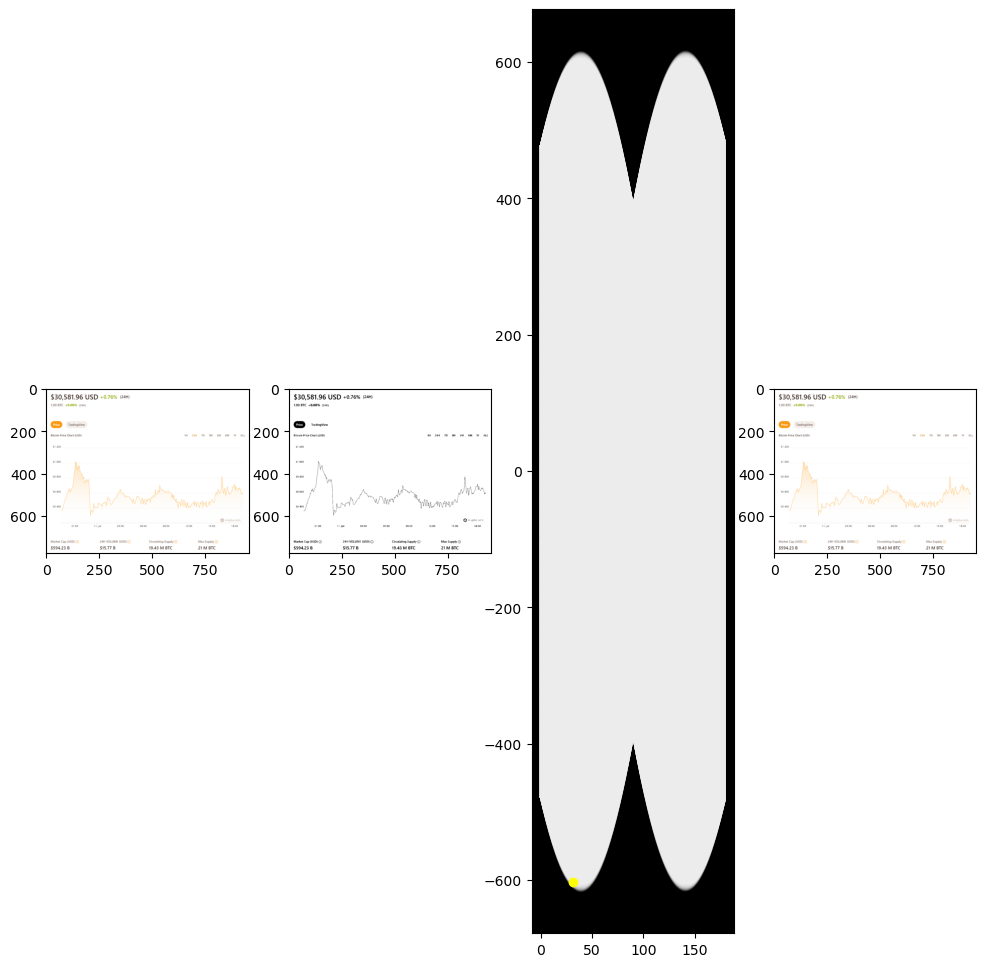

In [7]:
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------MAIN CODE---------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#---------------------------------------------------------------------------------------------READ FILE---------------------------------------------------------------------------------------------
image_path = "chart_samples/1.png"
input_img = cv2.imread(image_path)
bw_img = to_bw(input_img)
#blurred = cv2.GaussianBlur(bw_img, (3, 3), 2)

#------------------------------------------------------------------------------------------POST-PROCESSING------------------------------------------------------------------------------------------
#thr_value, th_img = cv2.threshold(bw_img, 100, 400, cv2.THRESH_BINARY_INV)                                 # smoother edges compared to regular binary, but quite bad for this application
#thresh2 = cv2.adaptiveThreshold(bw_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 10)    # mean adaptive thresholding results in less accurate parts of the image
#thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 25, 5) # gaussian adaptive thresholding works very well in identifing the different items

high_thresh, thresh = cv2.threshold(bw_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
lowThresh = 0.5*high_thresh

#kernel = np.ones((3, 3), np.uint8)                                                                     #higher kernel = less accurate contours
#close_img = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)                                          #erosion + dilute method (internal spaces removal)
#open_img = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)                                            #dilute + erosion method (noise removal)

#----------------------------------------------------------------------------EDGE DETENCTION & CONTOUR MAPPING----------------------------------------------------------------------------------
# apply automatic Canny edge detection using the computed median (https://pyimagesearch.com/2015/04/06/zero-parameter-automatic-canny-edge-detection-with-python-and-opencv/)


# Perform Canny edge detection



#contours, _ = cv2.findContours(open_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)       






cv2.imshow('input_img', input_img)
#cv2.imshow('bw_img', bw_img)
#cv2.imshow('close_img', close_img)
#cv2.imshow('open_img', open_img)
cv2.imshow('thresh', thresh)
#cv2.imshow('canny_img', canny_img)

key = cv2.waitKey(0)                                                                                   #wait for any key press
cv2.destroyAllWindows()                                                                                #close all windows displaying images
